# Minha Solução


In [1]:
import random
import numpy as np
import math

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

from bitstring import BitArray
import matplotlib.pyplot as plt

In [2]:
def check_queen_colision(x, y, m):
    """checa se há colisoes de rainhas numa dada coordenada a matriz

    Args:
        x (int): coordenada x
        y (int): coordenada y
        m (np.array(2x2)): matriz

    Returns:
        bool: True se há colisões, False se não
    """
    row = np.array(m[x,:])
    column = np.array(m[:,y])
    diag_1 = np.array(m).diagonal(y - x)
    dim = (len(m)-1)
    diag_2 = np.fliplr(m).diagonal( (dim - y) - x)
    
    array = np.concatenate((row, column, diag_1, diag_2))
    count = len([i for i in array if i > 0])
    if count > 4:
        return True
    return False
    

def count_queens_colisions(individual):
    """retorna o score de um individuo, baseado no número
    de rainhas que não apresentam

    Args:
        individual (tuple(n^2)): tupla com 1s e 0s, 1 = com rainha, 0 = sem rainha
    
    Returns:
        [int]: lista no shape (1,), com o score do individuo
    """
    n_queens = int(math.sqrt(len(individual)))
    count_queens = len([i for i in individual if i == 1])
    if count_queens != n_queens:
        return count_queens**count_queens,
    
    matrix = np.array(individual).reshape(n_queens,n_queens)
    score = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i,j] == 1:
                colision = check_queen_colision(i,j,matrix)
                if colision:
                    score += 1
    return score,

In [3]:
def generate_binary_n_queens_board(num_queens):
    """Generates a chess board with N queens plached whithin it
    will be place only queen per row and column

    Args:
        num_queens (int): number of queens

    Returns:
        tuple: (num_queens^2)
    """
    list_queen_position = random.sample(range(num_queens),num_queens)
    individual = []
    for index in range(num_queens):
        board_row = [0] * num_queens
        board_row[list_queen_position[index]] = 1
        individual += board_row
    return tuple(individual)

In [4]:
def main(NB_QUEENS = 8):
    random.seed(64)
    
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    toolbox.register("generate_board", generate_binary_n_queens_board, NB_QUEENS)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.generate_board)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", count_queens_colisions)
    toolbox.register("mate", tools.cxOnePoint)                   #cruzamento 1 ponto
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)     #mutacao swap (acho que é o mutFlitBit)
    toolbox.register("select", tools.selTournament, tournsize=3) #
    
    pop = toolbox.population(n=20)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=1000, stats=stats, halloffame=hof, verbose=True)
    
    return pop, log, hof

gen	nevals	avg 	std    	min	max
0  	20    	5.45	1.68745	2  	8  
1  	15    	1.56039e+13	6.5933e+13	2  	3.02875e+14
2  	13    	4.60109e+11	1.94093e+12	2  	8.9161e+12 
3  	15    	8.92129e+11	2.67466e+12	2  	8.9161e+12 
4  	13    	2.18951e+16	9.54367e+16	2  	4.37894e+17
5  	11    	5.70744e+14	2.41923e+15	2  	1.1112e+16 
6  	16    	2.18956e+16	9.54366e+16	2  	4.37894e+17
7  	13    	4.6059e+11 	1.94082e+12	2  	8.9161e+12 
8  	10    	1.56038e+13	6.5933e+13 	2  	3.02875e+14
9  	13    	4.6059e+11 	1.94082e+12	2  	8.9161e+12 
10 	9     	1.4285e+10 	6.21779e+10	2  	2.85312e+11
11 	9     	5e+08      	2.17945e+09	2  	1e+10      
12 	11    	4.60071e+11	1.94094e+12	2  	8.9161e+12 
13 	11    	1.60359e+13	6.58595e+13	2  	3.02875e+14
14 	13    	2.18947e+16	9.54368e+16	2  	4.37894e+17
15 	15    	4.6109e+11 	1.9407e+12 	2  	8.9161e+12 
16 	16    	1.48043e+10	6.20966e+10	2  	2.85312e+11
17 	13    	1.51443e+13	6.601e+13  	2  	3.02875e+14
18 	8     	5e+08      	2.17945e+09	2  	1e+10      
19 	13    	3.87421e

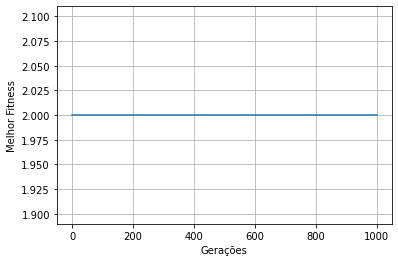

In [5]:
if __name__ == "__main__":
    NB_QUEENS = 8
    
    # run EA
    pop, log, _ = main(NB_QUEENS)
    print(pop)
    
    # plot
    gen = log.select('gen')
    best_per_gen = log.select('min')
    
    fig, ax = plt.subplots()
    ax.plot(gen, best_per_gen)
    ax.grid()
    ax.set(xlabel="Gerações", ylabel="Melhor Fitness")
    plt.show()